In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
from sklearn.linear_model import LinearRegression
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
#import seaborn as sns; sns.set_theme(color_codes=True)
import math

import numpy as np
import matplotlib.pyplot as plt
#New import statement
import scipy.optimize as fitter
from pandas import DataFrame
import csv
#import carmcmc as cm
print("X")


X


In [2]:
# for each object
# Read an object's file
# Seperate Data Pts by Filter
# For each filter:
# init output array (filter_output_array_<color>) for this filter
# Sort ALL data pts by time (least to greatest)
# For each batch of n(19) points
# Pick first n) pts find Time Median.
# Sort n pts by mag of the specific filter
# Record Time and Mag Median into Tuple/Dictionary and append this to filter_output_array_<color>
# Here we will have filter_output_array_red, filter_output_array_infra ...



os.chdir("/home/arjun/SIP/github/Science-Internsip-Program-/full/")
# For mac /Users/ArjunShrivastava/School/SIP/Astronomy Notebooks/Astronomy SIP Projects/AstronomyLab/Moving Median Model /full"
my_files = glob.glob('*.mjdmag')
#print(my_files[9])
print(len(my_files))
ranger = 14000 #This dictates the number of objects
uOutput = [[] for i in range(ranger)] 
gOutput = [[] for i in range(ranger)]
rOutput = [[] for i in range(ranger)]
iOutput = [[] for i in range(ranger)]
i2Output = [[] for i in range(ranger)]
zOutput = [[] for i in range(ranger)]
"""These 2D lists contain the raw data for each filter"""


u_timeMedian = [[] for i in range(ranger)]
g_timeMedian = [[] for i in range(ranger)]
r_timeMedian =[[] for i in range(ranger)]
i_timeMedian = [[] for i in range(ranger)]
i2_timeMedian = [[] for i in range(ranger)]
z_timeMedian = [[] for i in range(ranger)]

"""There are lists inside these lists, and each inner list contains a tuple of the median time and median magnitude"""


timeAxisU = [[] for i in range(ranger)]
magAxisU = [[] for i in range(ranger)]

timeAxisG = [[] for i in range(ranger)]
magAxisG = [[] for i in range(ranger)]  

timeAxisR = [[] for i in range(ranger)]
magAxisR = [[] for i in range(ranger)]

timeAxisI = [[] for i in range(ranger)]
magAxisI = [[] for i in range(ranger)]

timeAxisI2 = [[] for i in range(ranger)]
magAxisI2 = [[] for i in range(ranger)]

timeAxisZ = [[] for i in range(ranger)]
magAxisZ = [[] for i in range(ranger)]

"""The lists contain data to put in the moving median plots"""

"""These lists contain data for Standard Deviation (RMS Deviation) of the magnitude of every object
in a given filter."""

"""These lists contain data for the median of the magnitude of every object in a given filter"""
print(my_files[0:10])
my_files[0] = 'CFHTLS-VAR-J022515.65-045402.7.mjdmag'
#This is where we initialize all the arrays/lists to contain data

28108
['CFHTLS-VAR-J221558.75-172701.7.mjdmag', 'CFHTLS-VAR-J022601.39-042831.7.mjdmag', 'CFHTLS-VAR-J221400.10-180528.8.mjdmag', 'CFHTLS-VAR-J221502.63-174521.3.mjdmag', 'CFHTLS-VAR-J221622.16-180410.6.mjdmag', 'CFHTLS-VAR-J221502.60-173258.6.mjdmag', 'CFHTLS-VAR-J141821.00+530232.8.mjdmag', 'CFHTLS-VAR-J100003.99+014219.9.mjdmag', 'CFHTLS-VAR-J221535.74-175834.9.mjdmag', 'CFHTLS-VAR-J221710.98-172321.4.mjdmag']


In [21]:
D1evar = ["CFHTLS-VAR-J022459.67-041703.2",
"CFHTLS-VAR-J022735.05-043724.6",
"CFHTLS-VAR-J022735.05-043724.6",
"CFHTLS-VAR-J022710.09-044359.7",
"CFHTLS-VAR-J022625.76-042931.1", 
"CFHTLS-VAR-J022501.25-040806.7", 
"CFHTLS-VAR-J022700.57-045818.0", 
"CFHTLS-VAR-J022745.99-040653.1" ,
"CFHTLS-VAR-J022541.63-045849.5" ,
"CFHTLS-VAR-J022730.07-043815.4" ,
"CFHTLS-VAR-J022549.45-045502.7" ,
"CFHTLS-VAR-J022401.35-042537.5" ,
"CFHTLS-VAR-J022524.59-041147.8",
"CFHTLS-VAR-J022627.57-042416.0" ,
"CFHTLS-VAR-J022505.63-044530.4" ,
"CFHTLS-VAR-J022425.99-043947.3" ,
"CFHTLS-VAR-J022552.74-040519.2" ,
"CFHTLS-VAR-J022638.10-041513.9" ,
"CFHTLS-VAR-J022746.46-040100.6" ,
"CFHTLS-VAR-J022540.45-045150.9" ,
"CFHTLS-VAR-J022431.97-042936.1" ,
"CFHTLS-VAR-J022554.19-045028.5" ,
"CFHTLS-VAR-J022507.80-040011.4",
"CFHTLS-VAR-J022438.04-045914.7" ,
"CFHTLS-VAR-J022508.81-043800.7" ,
"CFHTLS-VAR-J022715.47-042540.2" ,
"CFHTLS-VAR-J022750.93-042524.1" ,
"CFHTLS-VAR-J022504.74-042222.5" ,
"CFHTLS-VAR-J022732.70-040551.7" ,
"CFHTLS-VAR-J022657.24-043356.7" ,
"CFHTLS-VAR-J022758.77-043154.4",
"CFHTLS-VAR-J022547.46-040938.1" ,
"CFHTLS-VAR-J022454.73-042554.9" ,
"CFHTLS-VAR-J022618.19-042631.7" ,
"CFHTLS-VAR-J022738.06-040524.8" ,
"CFHTLS-VAR-J022655.17-044517.7" ,
"CFHTLS-VAR-J022651.17-045745.7",
"CFHTLS-VAR-J022527.53-035954.4" ,
"CFHTLS-VAR-J022721.99-041757.8" ,
"CFHTLS-VAR-J022456.68-041334.0" ,
"CFHTLS-VAR-J022738.78-042000.2" ,
"CFHTLS-VAR-J022427.06-044428.8" ,
"CFHTLS-VAR-J022413.27-042230.8" ,
"CFHTLS-VAR-J022647.44-040826.7"]
DExtra =  ['CFHTLS-VAR-J221351.65-174649.0.mjdmag', 'CFHTLS-VAR-J221418.71-171754.4.mjdmag', 'CFHTLS-VAR-J221611.68-174805.1.mjdmag', 'CFHTLS-VAR-J221556.26-180356.2.mjdmag', 'CFHTLS-VAR-J022515.65-045402.7.mjdmag', 'CFHTLS-VAR-J022503.74-040056.3.mjdmag', 'CFHTLS-VAR-J221502.76-180913.6.mjdmag', 'CFHTLS-VAR-J221409.22-173554.5.mjdmag', 'CFHTLS-VAR-J221434.62-174656.6.mjdmag', 'CFHTLS-VAR-J221504.89-173554.3.mjdmag', 'CFHTLS-VAR-J221639.61-174630.1.mjdmag', 'CFHTLS-VAR-J022655.29-041210.8.mjdmag', 'CFHTLS-VAR-J100145.98+022028.6.mjdmag', 'CFHTLS-VAR-J141831.11+524240.6.mjdmag', 'CFHTLS-VAR-J221327.43-180418.0.mjdmag', 'CFHTLS-VAR-J221509.62-173416.6.mjdmag', 'CFHTLS-VAR-J142153.24+525202.7.mjdmag', 'CFHTLS-VAR-J095842.97+022050.7.mjdmag', 'CFHTLS-VAR-J221719.34-172213.9.mjdmag', 'CFHTLS-VAR-J221330.99-171840.3.mjdmag', 'CFHTLS-VAR-J221509.85-180606.3.mjdmag', 'CFHTLS-VAR-J022440.99-042733.9.mjdmag', 'CFHTLS-VAR-J141740.32+524351.0.mjdmag']
D1evar2 = []
for i in DExtra:
    #i = i + ".mjdmag"
    D1evar2.append(i)

x = 0
for i in D1evar2:
    #print(i)
    f = open(i)
    print(f.readlines()[1], x)
    x = x + 1


# RA,Dec: 333.6335254 -17.7813123
 0
# RA,Dec: 333.9781724 -17.3005293
 1
# RA,Dec: 334.1091383 -17.8034835
 2
# RA,Dec: 334.0548776 -18.0654330
 3
# RA,Dec: 036.4494390 -04.9035096
 4
# RA,Dec: 036.1118011 -04.0165189
 5
# RA,Dec: 334.0371631 -18.1534729
 6
# RA,Dec: 333.6485786 -17.6035147
 7
# RA,Dec: 333.7516457 -17.7828604
 8
# RA,Dec: 333.6614593 -17.5984784
 9
# RA,Dec: 334.3840753 -17.7773516
 10
# RA,Dec: 036.6164821 -04.2017876
 11
# RA,Dec: 149.8516697 +02.3398711
 12
# RA,Dec: 214.8552559 +52.7111843
 13
# RA,Dec: 333.6634715 -18.0702780
 14
# RA,Dec: 334.0369480 -17.5707098
 15
# RA,Dec: 215.1031891 +52.8689618
 16
# RA,Dec: 149.8525440 +02.3426173
 17
# RA,Dec: 333.9430335 -17.3708576
 18
# RA,Dec: 334.1822423 -17.3131816
 19
# RA,Dec: 334.1858561 -18.1014762
 20
# RA,Dec: 036.4219640 -04.4590306
 21
# RA,Dec: 214.6883716 +52.7289533
 22


In [4]:
def is_space(e):
    # This function removes the spaces in each line in the objectFile array.
    return e != ''

count = 0
def read_one_object(filepath, index):
    allow = True
    # This function reads data file for a specific object returns the data for the specfied filters.

    #print(filepath)
    objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
    # Here we get all the data from a single file. The delimeter gives the criteria of how the data is seperated in the array.


    # Initialized lists where we put the MDJ and Magnitude.

    for line in objectFile:
        #         print("Line :", line)
        try:
            x = line.split(" ")
        except TypeError as ke:
            return [], [], [], [], [], []
            
        #         print(x)
        x = list(filter(is_space, x))
        # print(x[0], x[1], x[8])
        # Using split and filter, we remove all the spaces in a single line so there are no indexs where there are spaces.

        data = (float(x[0]), float(x[1]))
        #print(data)

        if (x[8] == 'U'):
            uOutput[index].append(data)

        elif (x[8] == 'G'):
            gOutput[index].append(data)
        elif (x[8] == 'R'):
            rOutput[index].append(data)

        elif (x[8] == 'I'):
            iOutput[index].append(data)

        elif (x[8] == 'I2'):
            i2Output[index].append(data)
        elif (x[8] == 'Z'):
            zOutput[index].append(data)
            # This for loop appends the data from x (each line) and appends it to the specified filter array


    return uOutput[index], gOutput[index], rOutput[index], iOutput[index], i2Output[index], zOutput[index]
"""This for loop calls the file reading function multiple times to 
append all the data for each object."""
r = True
cands = ['CFHTLS-VAR-J100019.09+021330.0.mjdmag', 'CFHTLS-VAR-J100014.89+020803.1.mjdmag', 'CFHTLS-VAR-J100122.61+022345.1.mjdmag', 'CFHTLS-VAR-J221715.70-173900.0.mjdmag', 'CFHTLS-VAR-J100117.74+021904.1.mjdmag', 'CFHTLS-VAR-J022648.09-042449.0.mjdmag', 'CFHTLS-VAR-J022410.73-041105.1.mjdmag', 'CFHTLS-VAR-J095954.68+020402.0.mjdmag', 'CFHTLS-VAR-J221634.51-175422.1.mjdmag', 'CFHTLS-VAR-J022530.28-041807.1.mjdmag', 'CFHTLS-VAR-J022733.39-045531.1.mjdmag', 'CFHTLS-VAR-J221706.02-172607.1.mjdmag', 'CFHTLS-VAR-J221504.83-173301.1.mjdmag', 'CFHTLS-VAR-J221425.16-180941.0.mjdmag', 'CFHTLS-VAR-J221654.34-180539.0.mjdmag', 'CFHTLS-VAR-J142107.76+530318.1.mjdmag', 'CFHTLS-VAR-J022531.80-040248.1.mjdmag', 'CFHTLS-VAR-J221451.40-175608.1.mjdmag', 'CFHTLS-VAR-J221658.77-180545.1.mjdmag']
for i in range(ranger): 
    
    """if((i == 0) and r == True):
        if(i == 0):
           uOutput[i], gOutput[i], rOutput[i], iOutput[i], i2Output[i], zOutput[i] = read_one_object(cands[0], i)
    """
    
        #ind = random.randrange(0, 1000, 1)
    try:
        uOutput[i], gOutput[i], rOutput[i], iOutput[i], i2Output[i], zOutput[i] = read_one_object(my_files[i], i)
    except TypeError as ke:
        uOutput[i], gOutput[i], rOutput[i], iOutput[i], i2Output[i], zOutput[i] = [0], [0], [0], [0], [0], [0]
          
#print(uOutput, len(uOutput[0]) + len(gOutput[0]) + len(rOutput[0])+ len(iOutput[0]) + len(i2Output[0]) + len(zOutput[0]))


/tmp/ipykernel_3666/3096265083.py:11: UserWarning: loadtxt: Empty input file: "CFHTLS-VAR-J142208.62+531237.1.mjdmag"
  objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
/tmp/ipykernel_3666/3096265083.py:11: UserWarning: loadtxt: Empty input file: "CFHTLS-VAR-J141722.10+531208.8.mjdmag"
  objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
/tmp/ipykernel_3666/3096265083.py:11: UserWarning: loadtxt: Empty input file: "CFHTLS-VAR-J141736.37+531210.1.mjdmag"
  objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
/tmp/ipykernel_3666/3096265083.py:11: UserWarning: loadtxt: Empty input file: "CFHTLS-VAR-J142210.34+531224.0.mjdmag"
  objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
/tmp/ipykernel_3666/3096265083.py:11: UserWarning: loadtxt: Empty input file: "CFHTLS-VAR-J141932.19+531234.3.mjdmag"
  objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', u

In [5]:
def key_func(t):
    return t[1]
t = [(0,4),(3,6), (1,3),(-1,4)]
u = sorted(t,key=key_func)


def time_func(filterType):
    return t[0]
#We specify to sort only the MJD's in the tuples.


# Array of time medians and mag medians.
filterID = ""


def sorter(filterType, filterID, index):
    # print("x", filterID)
    # if(filterID == uOutput):
    #  filterID == "uOutput"
    #     if(filterID == gOutput):
    #
    # filterID == "gOutput"
    #     if(filterID == rOutput):
    #          filterID == "rOutput"
    #     if(filterID == iOutput):
    #          filterID == "iOutput"
    #     if(filterID == i2Output):
    #          filterID == "i2Output"
    #     if(filterID == zOutput):
    #          filterID == "zOutput"

    filterSORTED = sorted(filterType, key=time_func)
    # print(filterSORTED)
    return MedMaker(filterSORTED, filterID, index)

# Call the sorting funtion to order the tuples in the list by time.
# print(uOutputSORTED)
# uOutputSORTED contains the list where the tuples are organized by time.
def mag_func(filterType):
    return t[1]


# Sorting function to sort the tuples by magnitude in the U list.


def MedMaker(filterSORTED, filterID, index):
   # print("x", filterID)

    start = 0
    end = 18
    med = 9
   # print(filterID)
    while (end < len(filterSORTED)):

        # Allows us to record the median values.
        # print(med)
        # print(uOutputSORTED[med][0], med)
        timeMed = filterSORTED[med][0]
        # We put the index of the median into the sorted time array to get the median value.

        tempArray = filterSORTED[start:end + 1]
        # Temporarily, we put the the current the mangitudes 19 points of time in this run of the loop into an array.
        # The start and end keep appending to make it a moving median.
        tempArraySORTED = sorted(tempArray, key=mag_func)

        if (filterID == "uOutput"):
            # print(True)
            u_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return u_timeMedian

        if (filterID == "gOutput"):
            g_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return g_timeMedian

        if (filterID == "rOutput"):
            r_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return r_timeMedian

        if (filterID == "iOutput"):
            i_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i_timeMedian

        if (filterID == "i2Output"):
            i2_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i2_timeMedian

        if (filterID == "zOutput"):
            z_timeMedian[index].append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return z_timeMedian

        start += 1
        med += 1
        end += 1
#This cell takes care of proccesing the moving medians and appending them to lists 

In [6]:
def collectMedians():
    """This function calls the functions above to exceute the moving median procces """
    for i in range(ranger):
        sorter(uOutput[i], "uOutput", i)
        sorter(gOutput[i], "gOutput", i)
        sorter(rOutput[i], "rOutput", i)
        sorter(iOutput[i], "iOutput", i)
        sorter(i2Output[i], "i2Output", i)
        sorter(zOutput[i], "zOutput", i)

collectMedians()



In [7]:



def coList(ind):
    for t in u_timeMedian[ind]:
        timeAxisU[ind].append(t[0])
        magAxisU[ind].append(t[1])
    for t in g_timeMedian[ind]:
        timeAxisG[ind].append(t[0])
        magAxisG[ind].append(t[1])

    for t in r_timeMedian[ind]:
        timeAxisR[ind].append(t[0])
        magAxisR[ind].append(t[1])
    for t in i_timeMedian[ind]:
        timeAxisI[ind].append(t[0])
        magAxisI[ind].append(t[1])
    for t in i2_timeMedian[ind]:
        timeAxisI2[ind].append(t[0])
        magAxisI2[ind].append(t[1])
    for t in z_timeMedian[ind]:
        timeAxisZ[ind].append(t[0])
        magAxisZ[ind].append(t[1])

for i in range(ranger):
    coList(i)
"""We append the median data into different lists so we can plot the moving medians"""

'We append the median data into different lists so we can plot the moving medians'

In [8]:
#



origUTime = [[] for i in range(ranger)]
origUMag = [[] for i in range(ranger)]

origGTime = [[] for i in range(ranger)]
origGMag = [[] for i in range(ranger)]

origRTime = [[] for i in range(ranger)]
origRMag = [[] for i in range(ranger)]

origITime = [[] for i in range(ranger)]
origIMag = [[] for i in range(ranger)]

origI2Time = [[] for i in range(ranger)]
origI2Mag= [[] for i in range(ranger)]

origZTime = [[] for i in range(ranger)]
origZMag = [[] for i in range(ranger)]
"""These lists are initilized to split the raw time and magnitude so we can plot them"""
for tup in uOutput[0]:
    origUTime[0].append(tup[0])
    origUMag[1].append(tup[1])
for tup in gOutput[0]:
    origGTime[0].append(tup[0])
    origGMag[1].append(tup[1])
for tup in rOutput[0]:
    origRTime[0].append(tup[0])
    origRMag[1].append(tup[1])
for tup in iOutput[0]:
    origITime[0].append(tup[0])
    origIMag[1].append(tup[1])
for tup in i2Output[0]:
    origI2Time[0].append(tup[0])
    origI2Mag[1].append(tup[1])
for tup in zOutput[0]:
    origZTime[0].append(tup[0])
    origZMag[1].append(tup[1])
"""We then procced to append to these lists"""
    
"""
plt.ylim(23, 18)
plt.scatter(origUTime[0], origUMag[1],  c='blue', edgecolors='none', s=2 )
plt.scatter(origGTime[0], origGMag[1],  c='green', edgecolors='none', s=2 )
plt.scatter(origRTime[0], origRMag[1],  c='purple', edgecolors='none', s=2 )
plt.scatter(origITime[0], origIMag[1],  c='gold', edgecolors='none', s=2 )
plt.scatter(origUTime[0], origUMag[1],  c='gold', edgecolors='none', s=2 )
plt.scatter(origZTime[0], origZMag[1],  c='red', edgecolors='none', s=2)
plt.plot(timeAxisU[0], magAxisU[0], c='blue')
plt.plot(timeAxisG[0], magAxisG[0], c='green')
plt.plot(timeAxisR[0], magAxisR[0], c='purple')
plt.plot(timeAxisI[0], magAxisI[0], c='gold')
plt.plot(timeAxisI2[0], magAxisI2[0], c='gold')
plt.plot(timeAxisZ[0], magAxisZ[0], c='red')

"""
#Above is the commented out moving median plots

"""axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisG[0], magAxisG[0], c='green', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisR[0], magAxisR[0], c='red', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI[0], magAxisI[0], c='magenta', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI2[0], magAxisI2[0], c='brown', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisZ[0], magAxisZ[0], c='black', edgecolors='none', s=2)



axis[0,1].scatter(timeAxisU[1], magAxisU[1], c='blue', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisG[1], magAxisG[1], c='green', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisR[1], magAxisR[1], c='red', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI[1], magAxisI[1], c='magenta', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI2[1], magAxisI2[1], c='brown', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisZ[1], magAxisZ[1], c='black', edgecolors='none', s=2)



axis[0,2].scatter(timeAxisU[2], magAxisU[2], c='blue', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisG[2], magAxisG[2], c='green', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisR[2], magAxisR[2], c='red', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisI[2], magAxisI[2], c='magenta', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisI2[2], magAxisI2[2], c='brown', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisZ[2], magAxisZ[2], c='black', edgecolors='none', s=2)



axis[0,3].scatter(timeAxisU[3], magAxisU[3], c='blue', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisG[3], magAxisG[3], c='green', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisR[3], magAxisR[3], c='red', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisI[3], magAxisI[3], c='magenta', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisI2[3], magAxisI2[3], c='brown', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisZ[3], magAxisZ[3], c='black', edgecolors='none', s=2)

axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='blue', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='green', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='red', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='magenta', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='brown', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='black', edgecolors='none', s=2)


axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='blue', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5],c='green', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='red', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='magenta', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='brown', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='black', edgecolors='none', s=2)

axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='blue', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='green', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='red', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='magenta', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='brown', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='black', edgecolors='none', s=2)

print(timeAxisU[6], magAxisU[6])
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='blue', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='green', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='red', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='magenta', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='brown', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='black', edgecolors='none', s=2)


axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='blue', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='green', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='red', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='magenta', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='brown', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='black', edgecolors='none', s=2)

axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='blue', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='green', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='red', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='magenta', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='brown', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='black', edgecolors='none', s=2)

axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='blue', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='green', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='red', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='magenta', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='brown', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='black', edgecolors='none', s=2)

axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='blue', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='green', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='red', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='magenta', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='brown', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='black', edgecolors='none', s=2)

axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='blue', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='green', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='red', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='magenta', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='brown', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='black', edgecolors='none', s=2)

axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='blue', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='green', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='red', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='magenta', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='brown', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='black', edgecolors='none', s=2)

axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='blue', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='green', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='red', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='magenta', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='brown', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='black', edgecolors='none', s=2)

axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='blue', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='green', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='red', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='magenta', edgecolors='none', s=2)
axis[3,3].scatter(timeAxisU[15], magAxisU[15], c='brown', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='black', edgecolors='none', s=2)"""

#Above is the code to generate multiple moving median plots 

"axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisG[0], magAxisG[0], c='green', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisR[0], magAxisR[0], c='red', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisI[0], magAxisI[0], c='magenta', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisI2[0], magAxisI2[0], c='brown', edgecolors='none', s=2)\naxis[0,0].scatter(timeAxisZ[0], magAxisZ[0], c='black', edgecolors='none', s=2)\n\n\n\naxis[0,1].scatter(timeAxisU[1], magAxisU[1], c='blue', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisG[1], magAxisG[1], c='green', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisR[1], magAxisR[1], c='red', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisI[1], magAxisI[1], c='magenta', edgecolors='none', s=2)\naxis[0,1].scatter(timeAxisI2[1], magAxisI2[1], c='brown', edgecolors='none', s=2)\naxis[0,1].scatter(ti

In [10]:
U_RMS = []
G_RMS = []
R_RMS = []
I_RMS = []
I2_RMS = []
Z_RMS = []

U_M = []
G_M = []
R_M = []
I_M = []
I2_M = []
Z_M = []

def RMSArray(U, G, R, I, I2, Z):
 
    for i in U:
        #print(i, "llll")
        #if(len(i) < 1): print("found")
        #print(RMSCalc(i))

        if(i == []):
            #print(True)
            continue
        else:
            #print(i)
            U_M.append(np.median(i))
            #x = RMSCalc(i, "U")
            #U_RMS.append(abs(x**2 - np.mean(i)**2))

            U_RMS.append(np.std(i))
    for i in G:
        #print(i, "llll")
        #if(len(i) < 1): print("found")
        #print(RMSCalc(i))

        if(i == []):
            #print(True)
            continue
        else:
            #y = RMSCalc(i, "G")
            G_M.append(np.median(i))
            G_RMS.append(np.std(i))
    for i in R:
        #print(i, "llll")
        #if(len(i) < 1): print("found")
        #print(RMSCalc(i))

        if(i == []):
            continue
            #print(True)
        else:

            R_M.append(np.median(i))
            R_RMS.append(np.std(i))


RMSArray(magAxisU, magAxisG, magAxisR, magAxisI, magAxisI2, magAxisZ) ##Call the function



#fig, axis = plt.subplots(2, 2)





In [11]:
U_M2 = []

G_M2 = []

R_M2 = []

R_RMS2 = []

G_RMS2 = []

U_RMS2 = []


U_logRMS = np.log(U_RMS)
R_logRMS = np.log(R_RMS)
G_logRMS = np.log(G_RMS)
I2_logRMS = np.log(I2_RMS)
I_logRMS = np.log(I_RMS)
Z_logRMS = np.log(Z_RMS)
#This is to linearize the Stand Dev vs Median Graph 





#This is for the regression

/tmp/ipykernel_3666/4093149681.py:14: RuntimeWarning: divide by zero encountered in log
  U_logRMS = np.log(U_RMS)
/tmp/ipykernel_3666/4093149681.py:15: RuntimeWarning: divide by zero encountered in log
  R_logRMS = np.log(R_RMS)
/tmp/ipykernel_3666/4093149681.py:16: RuntimeWarning: divide by zero encountered in log
  G_logRMS = np.log(G_RMS)


In [12]:
"""def Remove_Unwanted_Vals(array1, array2):
    newArray1 = [] 
    newArray2 = [] 
    #print(array1)
    #print(array)
    for i in range(len(array1)): 

        if(pd.isna(array1[i]) == True or (math.isinf(array1[i]) and (array1[i] < 0 or array1[i] > 0)) == True):
            continue
        elif(pd.isna(array1[i]) == True or (math.isinf(array1[i]) and (array1[i] < 0 or array1[i] > 0)) == True):
             continue
        else:
            newArray1.append(array1[i])
            newArray2.append(array2[i])
    #print(newArray2)
    return newArray1, newArray2
   
U_M, U_logRMS = Remove_Unwanted_Vals(U_M, U_logRMS)
#G_M, G_logRMS = Remove_Unwanted_Vals(G_M, G_logRMS)
#Remove_Unwanted_Vals(R_M, R_logRMS)
print(np.isnan(U_M).any())
print(np.isnan(U_logRMS).any())
print(np.isinf(U_M).any())
print(np.isinf(U_logRMS).any())
#I_M, I_logRMS = Remove_Unwanted_Vals(I_M, I_logRMS)
#I2_M, I2_logRMS = Remove_Unwanted_Vals(I2_M, I2_logRMS)
#Z_M, Z_logRMS = Remove_Unwanted_Vals(Z_M, Z_logRMS)"""


'def Remove_Unwanted_Vals(array1, array2):\n    newArray1 = [] \n    newArray2 = [] \n    #print(array1)\n    #print(array)\n    for i in range(len(array1)): \n\n        if(pd.isna(array1[i]) == True or (math.isinf(array1[i]) and (array1[i] < 0 or array1[i] > 0)) == True):\n            continue\n        elif(pd.isna(array1[i]) == True or (math.isinf(array1[i]) and (array1[i] < 0 or array1[i] > 0)) == True):\n             continue\n        else:\n            newArray1.append(array1[i])\n            newArray2.append(array2[i])\n    #print(newArray2)\n    return newArray1, newArray2\n   \nU_M, U_logRMS = Remove_Unwanted_Vals(U_M, U_logRMS)\n#G_M, G_logRMS = Remove_Unwanted_Vals(G_M, G_logRMS)\n#Remove_Unwanted_Vals(R_M, R_logRMS)\nprint(np.isnan(U_M).any())\nprint(np.isnan(U_logRMS).any())\nprint(np.isinf(U_M).any())\nprint(np.isinf(U_logRMS).any())\n#I_M, I_logRMS = Remove_Unwanted_Vals(I_M, I_logRMS)\n#I2_M, I2_logRMS = Remove_Unwanted_Vals(I2_M, I2_logRMS)\n#Z_M, Z_logRMS = Remove_Unwa

In [13]:
AllData = list(zip(my_files, U_M, U_RMS, U_logRMS, G_M, G_RMS, G_logRMS, R_M, R_RMS, R_logRMS))
df = pd.DataFrame(data = AllData, columns=['Object', 'Median U Mag', 'Median U RMS', 'log Median U RMS', 'Median G Mag', 'Median G RMS', 'log Median G RMS', 'Median R Mag', 'Median R RMS', 'log Median R RMS'])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)


df          

,Object,Median U Mag,Median U RMS,log Median U RMS,Median G Mag,Median G RMS,log Median G RMS,Median R Mag,Median R RMS,log Median R RMS
0,CFHTLS-VAR-J022515.65-045402.7.mjdmag,20.9460,0.095016,-2.353708,18.698,0.240791,-1.423827,17.4630,0.272389,-1.300524
1,CFHTLS-VAR-J022601.39-042831.7.mjdmag,22.1245,0.206291,-1.578466,19.938,0.045455,-3.091032,18.7460,0.054505,-2.909465
2,CFHTLS-VAR-J221400.10-180528.8.mjdmag,22.9760,0.288753,-1.242184,22.163,0.091242,-2.394238,21.7970,0.125161,-2.078155
3,CFHTLS-VAR-J221502.63-174521.3.mjdmag,23.0410,0.278880,-1.276972,20.988,0.096718,-2.335955,19.9960,0.155272,-1.862580
4,CFHTLS-VAR-J221622.16-180410.6.mjdmag,18.9630,0.297078,-1.213761,17.955,0.007594,-4.880358,17.5130,0.012007,-4.422273
...,...,...,...,...,...,...,...,...,...,...
13328,CFHTLS-VAR-J095915.08+021750.8.mjdmag,23.9215,0.815748,-0.203650,22.865,0.210114,-1.560105,19.1400,0.011559,-4.460264
13329,CFHTLS-VAR-J095917.06+024253.5.mjdmag,25.1640,1.265294,0.235305,20.925,0.020259,-3.899163,23.7240,0.443105,-0.813948
13330,CFHTLS-VAR-J022733.21-040754.2.mjdmag,19.1415,0.226664,-1.484285,23.217,0.491435,-0.710426,20.2030,0.017891,-4.023469
13331,CFHTLS-VAR-J141815.96+525752.5.mjdmag,21.4805,0.381044,-0.964840,18.472,0.007676,-4.869694,21.5370,0.077704,-2.554844


In [14]:
def model(x, a, b, c, d, e, f, g, h, i):
    y = a*pow(x,8) + b*pow(x,7) + c*pow(x,6) + d*pow(x,5) + e*pow(x, 4) + f*pow(x,3) + g*x*x + h*x + i
    return y
#def model (x, a, b):


Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
['CFHTLS-VAR-J221715.28-172018.9.mjdmag', 'CFHTLS-VAR-J221559.76-174657.5.mjdmag', 'CFHTLS-VAR-J142103.27+523936.4.mjdmag', 'CFHTLS-VAR-J100152.02+023059.2.mjdmag', 'CFHTLS-VAR-J142141.60+522826.1.mjdmag', 'CFHTLS-VAR-J141716.07+521039.5.mjdmag', 'CFHTLS-VAR-J095848.27+020843.7.mjdmag', 'CFHTLS-VAR-J022526.23-042709.5.mjdmag', 'CFHTLS-VAR-J100120.37+014102.7.mjdmag', 'CFHTLS-VAR-J221613.87-173344.7.mjdmag', 'CFHTLS-VAR-J221651.71-174903.0.mjdmag', 'CFHTLS-VAR-J022634.49-045042.9.mjdmag', 'CFHTLS-VAR-J141632.80+530741.3.mjdmag', 'CFHTLS-VAR-J221708.51-173158.2.mjdmag', 'CFHTLS-VAR-J141849.33+531211.4.mjdmag', 'CFHTLS-VAR-J141830.21+522212.4.mjdmag', 'CFHTLS-VAR-J022437.71-041756.7.mjdmag', 'CFHTLS-VAR-J100220.78+020902.3.mjdmag', 'CFHTLS-VAR-J221330.86-172748.9.mjdmag', 'CFHTLS-VAR-J221549.71-175432.5.mjdmag', 'CFHTLS-VAR-J221411.57-174605.0.mjdmag', 'CFHTLS-VAR-J100115.27+015101.3.mjdmag', 'CFHTLS

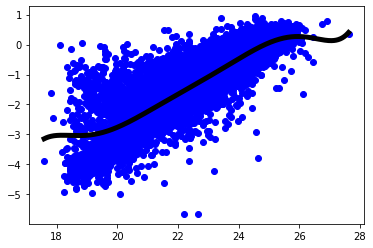

In [15]:
Ux = list(df["Median U Mag"])

Uy = list(df["log Median U RMS"])

#print(len(U_logRMS), len(U_M), len(df["Object"]))
plt.scatter(Ux, Uy, c='b')

par, cov = fitter.curve_fit(model, Ux, Uy, p0=None, sigma=None)
xBlue = np.arange(min(Ux), max(Ux), 0.01)

plt.plot(xBlue,model(xBlue, *par),c = 'black', linewidth = 5)

bMarginal = []
bIntermediate = []
bExtreme = []

for i in range(len(df["Object"])):

    diff = Uy[i] - model(Ux[i], *par)

    if(np.log10(2) <=diff <=np.log10(3)):
        try: 
            bMarginal.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
        
        
    elif(np.log10(3) <=diff <=np.log10(5)):
        try: 
             bIntermediate.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
       
    elif(np.log10(5) <=diff):
        try: 
             bExtreme.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
        
        
print(bMarginal, "\n")
print(bIntermediate, "\n")
print(bExtreme)

Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
['CFHTLS-VAR-J221559.76-174657.5.mjdmag', 'CFHTLS-VAR-J022526.23-042709.5.mjdmag', 'CFHTLS-VAR-J141835.16+523756.4.mjdmag', 'CFHTLS-VAR-J141723.84+531043.1.mjdmag', 'CFHTLS-VAR-J022647.84-040951.3.mjdmag', 'CFHTLS-VAR-J221507.86-171743.8.mjdmag', 'CFHTLS-VAR-J221621.32-180709.3.mjdmag', 'CFHTLS-VAR-J100112.56+015038.0.mjdmag', 'CFHTLS-VAR-J095847.73+022127.8.mjdmag', 'CFHTLS-VAR-J221411.57-174605.0.mjdmag', 'CFHTLS-VAR-J221550.92-171553.6.mjdmag', 'CFHTLS-VAR-J221402.49-174639.8.mjdmag', 'CFHTLS-VAR-J221358.09-173333.4.mjdmag', 'CFHTLS-VAR-J100115.27+015101.3.mjdmag', 'CFHTLS-VAR-J022601.19-044418.2.mjdmag', 'CFHTLS-VAR-J221445.26-173243.6.mjdmag', 'CFHTLS-VAR-J022516.61-045308.4.mjdmag', 'CFHTLS-VAR-J221646.86-175410.8.mjdmag', 'CFHTLS-VAR-J141907.02+524336.7.mjdmag', 'CFHTLS-VAR-J100056.99+022848.6.mjdmag', 'CFHTLS-VAR-J022431.82-045834.8.mjdmag', 'CFHTLS-VAR-J100017.02+021027.8.mjdmag', 'CFHTLS-VAR-J100227.33

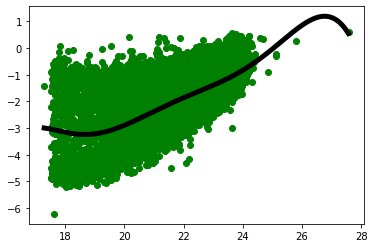

In [16]:
Gx = list(df["Median G Mag"])
Gy = list(df["log Median G RMS"])
plt.scatter(Gx, Gy, c='g')
#print(len(G_logRMS), len(G_M), len(df["Object"]))
par, cov = fitter.curve_fit(model, Gx, Gy, p0=None, sigma=None)
xGreen = np.arange(min(Gx), max(Gx), 0.01)

plt.plot(xGreen,model(xGreen, *par),c = 'black', linewidth = 5)

gMarginal = []
gIntermediate = []
gExtreme = []
#print(df["Median U Mag"][246])
for i in range(len(df["Object"])):

    diff = Gy[i] - model(Gx[i], *par)

    if(np.log10(2) <=diff <=np.log10(3)):
        try: 
            gMarginal.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
        
        
    elif(np.log10(3) <=diff <=np.log10(5)):
        try: 
            gIntermediate.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
        
        
    elif(np.log10(5) <=diff):
        
        try: 
            gExtreme.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
       
       
        
print(gMarginal, "\n")
print(gIntermediate, "\n")
print(gExtreme)


Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
Fixed KeyError
['CFHTLS-VAR-J141855.96+521930.2.mjdmag', 'CFHTLS-VAR-J221715.28-172018.9.mjdmag', 'CFHTLS-VAR-J141644.59+522908.6.mjdmag', 'CFHTLS-VAR-J141951.54+522059.7.mjdmag', 'CFHTLS-VAR-J095841.11+022812.9.mjdmag', 'CFHTLS-VAR-J100209.56+020726.1.mjdmag', 'CFHTLS-VAR-J221604.92-181104.6.mjdmag', 'CFHTLS-VAR-J221422.04-180912.5.mjdmag', 'CFHTLS-VAR-J141830.21+522212.4.mjdmag', 'CFHTLS-VAR-J141716.17+524346.9.mjdmag', 'CFHTLS-VAR-J100002.73+014445.6.mjdmag', 'CFHTLS-VAR-J100220.78+020902.3.mjdmag', 'CFHTLS-VAR-J095928.44+014900.5.mjdmag', 'CFHTLS-VAR-J141920.63+521811.9.mjdmag', 'CFHTLS-VAR-J141734.43+521915.9.mjdmag', 'CFHTLS-VAR-J100006.60+024411.0.mjdmag', 'CFHTLS-VAR-J221540.91-173649.4.mjdmag', 'CFHTLS-VAR-J022525.63-041242.4.mjdmag', 'CFHTLS-VAR-J221339.60-175144.6.mjdmag', 'CFHTLS-VAR-J221447.70-180931.6.mjdmag', 'CFHTLS-VAR-J221451.38-175956.5.mjdmag', 'CFHTLS-VAR-J100030.86+014234.9.mjdmag', 'CFHTLS

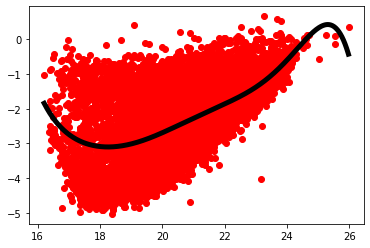

In [17]:
Rx = list(df["Median R Mag"])
Ry = list(df["log Median R RMS"])
plt.scatter(Rx, Ry, c='r')
par, cov = fitter.curve_fit(model, Rx, Ry, p0=None, sigma=None)
xRed = np.arange(min(Rx), max(Rx), 0.01)

plt.plot(xRed,model(xRed, *par),c = 'black', linewidth = 5)

rMarginal = []
rIntermediate = []
rExtreme = []
#t(df["Object"][1312:1320])
for i in range(len(df["Object"])):

    diff = Ry[i] - model(Rx[i], *par)

    if(np.log10(2) <=diff <=np.log10(3)):
        try: 
            rMarginal.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
        
    elif(np.log10(3) <=diff <=np.log10(5)):
        try: 
            rIntermediate.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
        
        
    elif(np.log10(5) <=diff):
        try: 
            rExtreme.append(df["Object"][i])
          
            #print(i)
        except KeyError as ke:
            print("Fixed KeyError")
            continue
        
print(rMarginal, "\n")
print(rIntermediate, "\n")
print(rExtreme)



In [18]:
bMarginal2 = set(bMarginal)
bIntermediate2 = set(bIntermediate)
bExtreme2 = set(bExtreme)

gMarginal2 = set(gMarginal)
gIntermediate2 = set(gIntermediate)
gExtreme2 = set(gExtreme)

rMarginal2 = set(rMarginal)
rIntermediate2 = set(rIntermediate)
rExtreme2 = set(rExtreme)

CommonMarginal = list(bMarginal2.intersection(gMarginal2, rMarginal2))
CommonIntermediate = list(bIntermediate2.intersection(gIntermediate2 , rIntermediate2))
CommonExtreme = list(bExtreme2.intersection(gExtreme2, rExtreme2))
print(CommonMarginal,"\n", CommonIntermediate, "\n", CommonExtreme)

['CFHTLS-VAR-J221553.85-181418.0.mjdmag', 'CFHTLS-VAR-J142234.43+524031.2.mjdmag', 'CFHTLS-VAR-J221530.82-172011.9.mjdmag', 'CFHTLS-VAR-J221621.04-172704.1.mjdmag', 'CFHTLS-VAR-J022652.62-044119.5.mjdmag', 'CFHTLS-VAR-J142237.95+523255.9.mjdmag', 'CFHTLS-VAR-J221629.37-173102.3.mjdmag', 'CFHTLS-VAR-J221354.24-175512.7.mjdmag'] 
 ['CFHTLS-VAR-J100138.07+022840.9.mjdmag', 'CFHTLS-VAR-J221412.55-174221.9.mjdmag'] 
 ['CFHTLS-VAR-J221351.65-174649.0.mjdmag', 'CFHTLS-VAR-J221418.71-171754.4.mjdmag', 'CFHTLS-VAR-J221611.68-174805.1.mjdmag', 'CFHTLS-VAR-J221556.26-180356.2.mjdmag', 'CFHTLS-VAR-J022515.65-045402.7.mjdmag', 'CFHTLS-VAR-J022503.74-040056.3.mjdmag', 'CFHTLS-VAR-J221502.76-180913.6.mjdmag', 'CFHTLS-VAR-J221409.22-173554.5.mjdmag', 'CFHTLS-VAR-J221434.62-174656.6.mjdmag', 'CFHTLS-VAR-J221504.89-173554.3.mjdmag', 'CFHTLS-VAR-J221639.61-174630.1.mjdmag', 'CFHTLS-VAR-J022655.29-041210.8.mjdmag', 'CFHTLS-VAR-J100145.98+022028.6.mjdmag', 'CFHTLS-VAR-J141831.11+524240.6.mjdmag', 'CFHTLS-V

In [22]:
#print(bMarginal, bIntermediate, bExtreme, gMarginal, gIntermediate, gExtreme, rMarginal, rIntermediate, rExtreme, CommonMarginal, CommonIntermediate, CommonExtreme)
#RMS= list(zip(bMarginal, bIntermediate, bExtreme, gMarginal, gIntermediate, gExtreme, rMarginal, rIntermediate, rExtreme))
RMS= list(zip(CommonExtreme))
#print(len(bExtreme), len(gExtreme), len(rExtreme))
df2 = pd.DataFrame(RMS, columns = ["Objects extreme in all three categories"])
df2

,Objects extreme in all three categories
0,CFHTLS-VAR-J221351.65-174649.0.mjdmag
1,CFHTLS-VAR-J221418.71-171754.4.mjdmag
2,CFHTLS-VAR-J221611.68-174805.1.mjdmag
3,CFHTLS-VAR-J221556.26-180356.2.mjdmag
4,CFHTLS-VAR-J022515.65-045402.7.mjdmag
5,CFHTLS-VAR-J022503.74-040056.3.mjdmag
6,CFHTLS-VAR-J221502.76-180913.6.mjdmag
7,CFHTLS-VAR-J221409.22-173554.5.mjdmag
8,CFHTLS-VAR-J221434.62-174656.6.mjdmag
9,CFHTLS-VAR-J221504.89-173554.3.mjdmag


In [20]:
"""CFHTLS-VAR-J022541.63-045849.5.mjdmag"""

'CFHTLS-VAR-J022541.63-045849.5.mjdmag'

In [ ]:
"""def InitializePlot():
    plt.clf()
    f = plt.figure(figsize=(20, 20))


    plt.xlabel('Mean of Magnitudes')
    plt.ylabel('RMS-Median')
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])
f = InitializePlot()"""
figure, axis = plt.subplots(2 ,3)
zUltra = 0
zGreen = 0
zRed = 0
zInf = 0
zInf2 = 0
zFInf = 0
pUltra = 0
pGreen = 0
pRed = 0
pInf = 0
pInf2 = 0
pFInf = 0

if(r == False):
    user2 = random.randrange(0, 100)
else:
    user2 = 0
"""axis[0,0].scatter(timeAxisU[user2], magAxisU[user2], c='blue', s=1, label = "U")
axis[0,1].scatter(timeAxisG[user2], magAxisG[user2], c='green', s=1, label = "G")
axis[0,2].scatter(timeAxisR[user2], magAxisR[user2], c='purple', s=1, label = "R")
axis[1,0].scatter(timeAxisI[user2], magAxisI[user2], c='gold', s=1, label = "I")
axis[1,1].scatter(timeAxisI2[user2], magAxisI2[user2], c='gold', s=1, label = "I2")
axis[1,2].scatter(timeAxisZ[user2], magAxisZ[user2], c='red', s=1, label = "Z")"""

plt.ylim(27, 18)
zUIn = np.arange(min(timeAxisU[user2]), max(timeAxisU[user2]), 1)
zUltra= np.polyfit(timeAxisU[user2], magAxisU[user2], 15)
pUltra = np.poly1d(zUltra)


axis[0,0].plot(zUIn, pUltra(zUIn), c='navy', label = "Regression Ultraviolet")
#plt.scatter(timeAxisU[user2], pUltra(timeAxisU[user2]), c='orange', s=10, label = "Regression Ultraviolet")
#plt.legend(loc=2, prop={'size': 15})

zGIn = np.arange(min(timeAxisG[user2]), max(timeAxisG[user2]), 1)
zGreen= np.polyfit(timeAxisG[user2], magAxisG[user2], 15)
pGreen = np.poly1d(zGreen)
axis[0,1].plot(zGIn, pGreen(zGIn), c='lime', label = "Regression Green")
#plt.legend(loc=2, prop={'size': 15})


zRIn = np.arange(min(timeAxisR[user2]), max(timeAxisR[user2]), 1)
zRed= np.polyfit(timeAxisR[user2], magAxisR[user2], 15)
pRed = np.poly1d(zRed)
axis[0,2].plot(zRIn, pRed(zRIn), c='magenta', label = "Regression Red ")
#plt.legend(loc=2, prop={'size': 15})

ziIn = np.arange(min(timeAxisI[user2]), max(timeAxisI[user2]), 1)
zInf= np.polyfit(timeAxisI[user2], magAxisI[user2], 15)
pInf = np.poly1d(zInf)
axis[1,0].plot(ziIn, pInf(ziIn), c='black',label = "Regression Infrared")
#plt.legend(loc=2, prop={'size': 15})


zi2In = np.arange(min(timeAxisI2[user2]), max(timeAxisI2[user2]), 1)
zInf2= np.polyfit(timeAxisI2[user2], magAxisI2[user2], 15)
pInf2 = np.poly1d(zInf2)
axis[1, 1].plot(zi2In, pInf2(zi2In), c='black')
#plt.legend(loc=2, prop={'size': 15})


zZin = np.arange(min(timeAxisZ[user2]), max(timeAxisZ[user2]), 1)
zFInf= np.polyfit(timeAxisZ[user2], magAxisZ[user2], 15)
pFInf = np.poly1d(zFInf)
axis[1,2].plot(zZin, pFInf(zZin), c='maroon', label = "Regression Z")
#plt.legend(loc=4, prop={'size': 8})


#print(len(p(timeAxisR[user2])), len(magAxisR[user2]))


                                                    
    
    

In [ ]:
user2 = 0
plt.scatter(timeAxisU[user2], magAxisU[user2], c='green', s=1)
plt.scatter(timeAxisG[user2], magAxisG[user2], c='green', s=1)
plt.scatter(timeAxisR[user2], magAxisR[user2], c='purple', s=1)
plt.scatter(timeAxisI[user2], magAxisI[user2], c='gold', s=1)
plt.scatter(timeAxisI2[user2], magAxisI2[user2], c='gold', s=1)
plt.scatter(timeAxisZ[user2], magAxisZ[user2], c='red', s=1)
"""plt.plot(zUIn, pUltra(zUIn), c='navy', label = "Regression Ultraviolet")
plt.plot(zGIn, pGreen(zGIn), c='lime', label = "Regression Green")
plt.plot(zRIn, pRed(zRIn), c='magenta', label = "Regression Red ")
plt.plot(ziIn, pInf(ziIn), c='black',label = "Regression Infrared")
plt.plot(zi2In, pInf2(zi2In), c='black')
plt.plot(zZin, pFInf(zZin), c='maroon', label = "Regression Z")"""

plt.ylim(16, 27)

In [ ]:

"""timeGapG = [0]
#print(timeAxisG[0])
#print(timeAxisG)
for i in range(len(timeAxisG)):
    if(i < len(timeAxisG) - 1):
        #print(timeAxisG[0][i], timeAxisG[0][i+1] )
        
        if(abs(timeAxisG[0][i] - timeAxisG[0][i+1]) > 24):
            timeGapG.append(i)
timeGapG.append(len(timeAxisG[0])-1)
print(timeGapG)
magAxisG2 = magAxisG[0][0:timeGapG[1]+1]
timeAxisG2 = timeAxisG[0][0:timeGapG[1]+1]
#print((timeAxisG2), (magAxisG2))


for i in timeGapG:
    print(timeAxisG[0][i])

plt.scatter(timeAxisG2, magAxisG2, c='green', s=1)
plt.xlim(52500, 56500)
plt.ylim(20, 26)

x = min(timeAxisG2)
print(x)
for t in range(len(timeAxisG2)):
    timeAxisG2[t] = timeAxisG2[t] - x
print(timeAxisG2)

plt.plot(timeAxisG2, magAxisG2, c='green')"""
